In [1]:
# Nmae : Himanshu Agarwal , Net id: HXA180027
#q4. Pima Indian Diabetes dataset
#mporting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
#import data using the pandas libraries.
diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

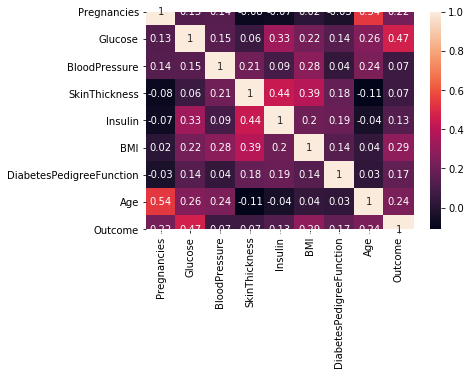

In [9]:
correlation_matrix = diabetes_dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# we can see from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. 
#Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

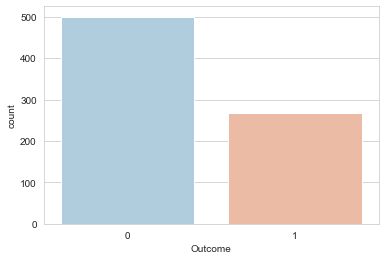

In [10]:
# how many people in the dataset are diabetic and how many are not. We can check it using barplot.
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=diabetes_dataset,palette='RdBu_r')

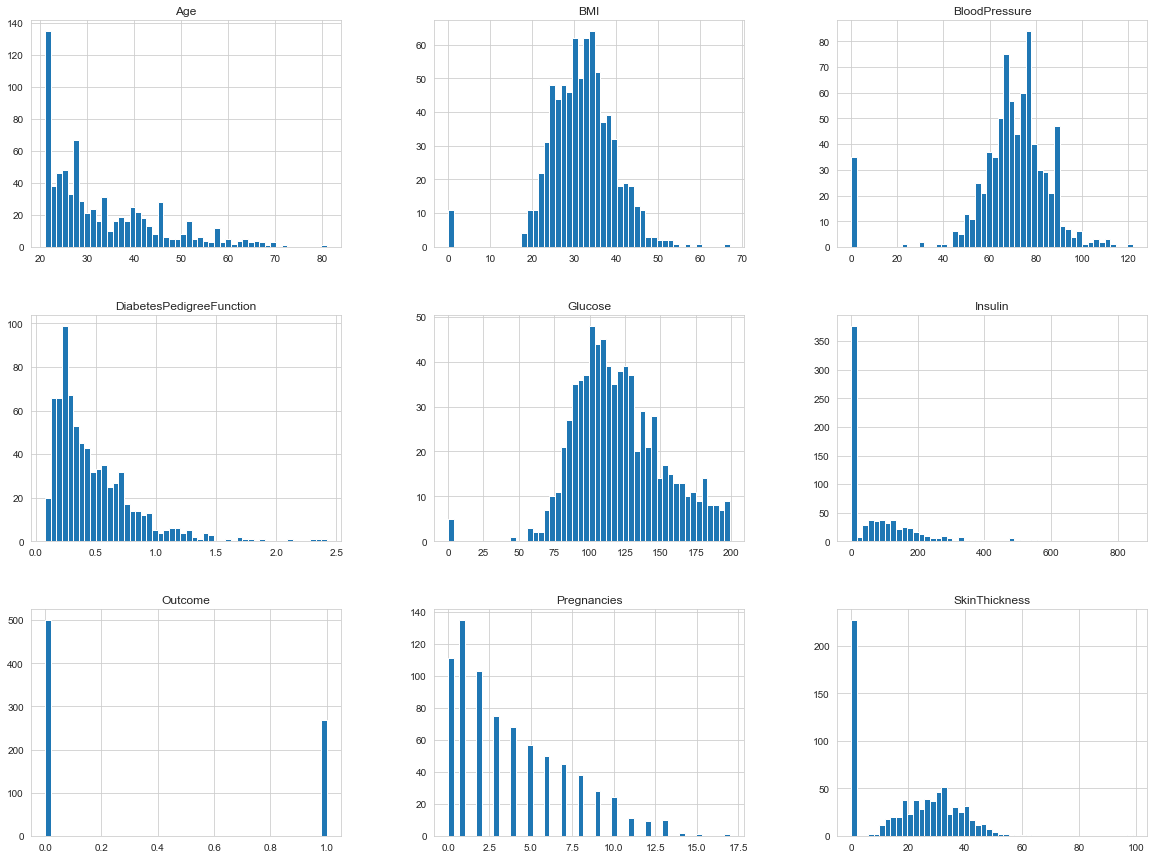

In [12]:
#Data Visualization

#Visualising the data is an important step of the data analysis. 
#With a graphical visualisation of the data we have a better understanding of the various features values distribution: 
#for example we can understand what's the average age of the people or the average BMI etc...

import matplotlib.pyplot as plt
diabetes_dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
# I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people
#have null (zero)/Missing values for some of the features: it's not quite possible to have 0 as BMI or for the blood pressure. 

In [13]:
#Data cleaning and transformation
#To handle the missing and null values
# Replace all the null(zero) values by their median.
#Calculating the median value for BMI
median_bmi = diabetes_dataset['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
diabetes_dataset['BMI'] = diabetes_dataset['BMI'].replace(
    to_replace=0, value=median_bmi)

In [17]:
#Calculate the median value for BloodPressure
median_bloodp = diabetes_dataset['BloodPressure'].median()
# Substitute it in the BloodPressure column of the
# dataset where values are 0
diabetes_dataset['BloodPressure'] = diabetes_dataset['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)
# Calculate the median value for Glucose
median_plglcconc = diabetes_dataset['Glucose'].median()
# Substitute it in the Glucose column of the
# dataset where values are 0
diabetes_dataset['Glucose'] = diabetes_dataset['Glucose'].replace(
    to_replace=0, value=median_plglcconc)
# Calculate the median value for SkinThickness
median_skinthick = diabetes_dataset['SkinThickness'].median()
# Substitute it in the SkinThickness column of the
# dataset where values are 0
diabetes_dataset['SkinThickness'] = diabetes_dataset['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)
# Calculate the median value for Insulin
median_twohourserins = diabetes_dataset['Insulin'].median()
# Substitute it in the Insulin column of the
# dataset where values are 0
diabetes_dataset['Insulin'] = diabetes_dataset['Insulin'].replace(to_replace=0, value=median_twohourserins)

In [ ]:
#Haven't transformed all the columns, because for some values can make sense to be zero (like "Number of times pregnant")

In [35]:
from sklearn.model_selection import train_test_split #Library to split the data in training and test sets.
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#train the model with 80% of the samples and test with the remaining 20%. 
#We do this to assess the model’s performance on unseen data. 
X_train, X_test, y_train, y_test = train_test_split(diabetes_dataset.drop('Outcome',axis=1),diabetes_dataset['Outcome'], test_size=0.20,random_state=101)

In [36]:
#using scikit-learn’s Logistic Regression to train our model on the training set.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train) 


predictions_train = logmodel.predict(X_train) # Making prediction on training set
print("Classification Report on Training data")
print(classification_report(y_train,predictions_train))  
print("Accuracy on Training data:",accuracy_score(y_train, predictions_train))



Classification Report on Training data
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       397
           1       0.74      0.56      0.64       217

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614

Accuracy on Training data: 0.7752442996742671


C:\Users\himan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
predictions_test = logmodel.predict(X_test)  #Making prediction on test set
print("Classification Report on Test data")
print(classification_report(y_test,predictions_test))  
print("Accuracy on Test data:",accuracy_score(y_test, predictions_test))

Classification Report on Test data
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       103
           1       0.70      0.65      0.67        51

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154

Accuracy on Test data: 0.7922077922077922
